# Exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt


from scipy.optimize import brentq
from scipy.signal import convolve
from scipy.signal.windows import gaussian

## Q3: Basis of attraction

Consider the function

$$q(x) = x^3 - 2x^2 - 11x + 12$$

This has 3 roots has you should find them all. This equation is known to cause problems for some root-finding methods  because it exhibits [basis of attraction](https://en.wikipedia.org/wiki/Newton%27s_method#Basins_of_attraction) -- very closely spaced initial guesses leave to very different roots.

Use the scipy `optimize.brentq` method to find the roots.  You might need to play around with the intervals to find all 3 roots (try plotting the function to help)

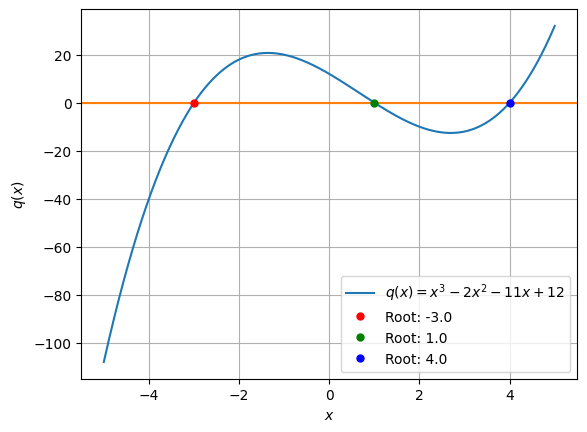

Roots are: -3.0, 1.0, 4.0


In [2]:
def q(x):
    return x**3 - 2 * x**2 - 11 * x + 12

x = np.linspace(-5, 5, 500)
y = q(x)

root1 = brentq(q, -3, -1)
root2 = brentq(q, 0, 2)
root3 = brentq(q, 2.5, 4)

plt.plot(x, y, label="$q(x) = x^3 - 2x^2 - 11x + 12$")
plt.axhline(0, color="tab:orange")
plt.plot(root1, 0, 'ro', markersize=5, label=f"Root: {round(root1,2)}")
plt.plot(root2, 0, 'go', markersize=5, label=f"Root: {round(root2,2)}")
plt.plot(root3, 0, 'bo', markersize=5, label=f"Root: {round(root3,2)}")
plt.xlabel("$x$")
plt.ylabel("$q(x)$")
plt.legend(loc='best')
plt.grid(True)
plt.show()

print(f"Roots are: {round(root1,2)}, {round(root2,2)}, {round(root3,2)}")

## Q7: Noisy signal

A convolution is defined as:  

  \begin{equation}                                                                           
    (f \star g)(t) \equiv \int_{-\infty}^{\infty} f(\tau) g(t - \tau) d\tau                   
  \end{equation}                                                                             

  It is easy to compute this with FFTs, via the _convolution theorem_,                                                                        
  \begin{equation}                                         
    \mathcal{F}\{f \star g\} = \mathcal{F}\{f\} \, \mathcal{F}\{g\}                                          
  \end{equation}                                         
  That is: the Fourier transform of the convolution of $f$ and $g$ is simply
  the product of the individual transforms of $f$ and $g$.  This allows us
  to compute the convolution via multiplication in Fourier space and then take
  the inverse transform, $\mathcal{F}^{-1}\{\}$, to recover the convolution in real space:
  
  \begin{equation}
  f \star g = \mathcal{F}^{-1}\{ \mathcal{F}\{f\} \, \mathcal{F}\{g\}\}
  \end{equation}
  
A common use of a convolution is to smooth noisy data, for example by convolving noisy data with a Gaussian.  We'll do that here.

Here's some noisy data we'll work with

In [3]:
def fdata(x, L):
    A = L/10.0
    return 2*np.sin(2*np.pi*x/L) + x*(L-x)**2/L**3 * np.cos(x) + \
           5*x*(L-x)/L**2 + A/2 + 0.1*A*np.sin(13*np.pi*x/L)

N = 2048
L = 50.0
x = np.linspace(0, L, N, endpoint=False)
orig = fdata(x, L)
noisy = orig + 0.5*np.random.randn(N)

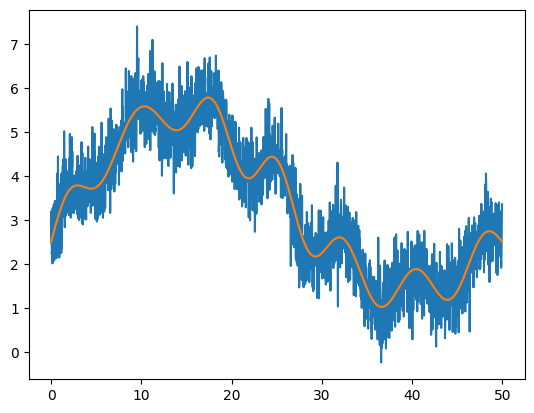

In [4]:
plt.plot(x, noisy)
plt.plot(x, orig)

SciPy provides a convolution function `scipy.signal.convolve()` that can do the convolution for us directly.  To smooth the data, we want to use a Gaussian, which can be produced by `scipy.signal.gaussian()`.

Convolve the noisy data with a Gaussian and plot the result together with the original data `orig`.  You'll need to play with the width of the Gaussian to get a nice smoothing.  You also will need to normalize the Gaussian so that it sums to 1, otherwise, your convolved data will be shifted verfically from the original function.

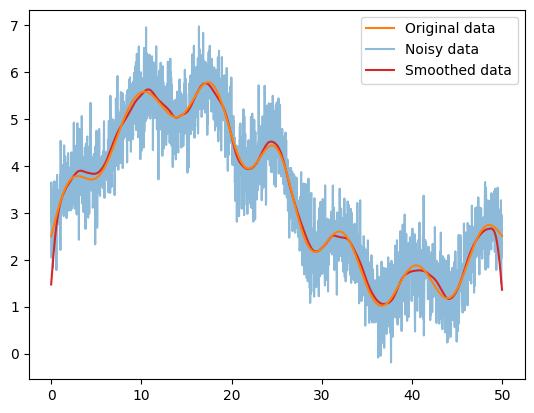

In [5]:
def fdata(x, L):
    A = L / 10.0
    return (
        2 * np.sin(2 * np.pi * x / L)
        + x * (L - x) ** 2 / L**3 * np.cos(x)
        + 5 * x * (L - x) / L**2
        + A / 2
        + 0.1 * A * np.sin(13 * np.pi * x / L)
    )


def normalized_gaussian(width, size):
    g = gaussian(size, std=width)
    return g / g.sum()


N = 2048
L = 50.0
x = np.linspace(0, L, N, endpoint=False)

orig = fdata(x, L)
noisy = orig + 0.5 * np.random.randn(N)

width = 20
kernel_size = 100
gaussian_kernel = normalized_gaussian(width, kernel_size)

smoothed = convolve(noisy, gaussian_kernel, mode="same")

plt.plot(x, orig, label="Original data", color="tab:orange", zorder=2)
plt.plot(x, noisy, label="Noisy data", color="tab:blue", zorder=0, alpha=0.5)
plt.plot(x, smoothed, label="Smoothed data", color="tab:red", zorder=1)
plt.legend()
plt.show()